# Process phase

In [144]:
import pandas as pd
import matplotlib.pyplot as plt

In [109]:
original_data = pd.read_csv('data/dailyActivity_merged.csv')
original_sleep_data = pd.read_csv('data/SleepDay_merged.csv')

In [110]:
df = original_data.copy()
sleepdf = original_sleep_data.copy()

In [111]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [112]:
df.shape

(940, 15)

In [113]:
df = df.loc[(df!=0).any(axis=1)] # drop all full 0 rows

In [114]:
df = df.drop(df[df.TotalSteps == 0].index)

In [115]:
df.shape

(863, 15)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 863 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        863 non-null    int64  
 1   ActivityDate              863 non-null    object 
 2   TotalSteps                863 non-null    int64  
 3   TotalDistance             863 non-null    float64
 4   TrackerDistance           863 non-null    float64
 5   LoggedActivitiesDistance  863 non-null    float64
 6   VeryActiveDistance        863 non-null    float64
 7   ModeratelyActiveDistance  863 non-null    float64
 8   LightActiveDistance       863 non-null    float64
 9   SedentaryActiveDistance   863 non-null    float64
 10  VeryActiveMinutes         863 non-null    int64  
 11  FairlyActiveMinutes       863 non-null    int64  
 12  LightlyActiveMinutes      863 non-null    int64  
 13  SedentaryMinutes          863 non-null    int64  
 14  Calories       

In [117]:
unique_Ids = df.Id.unique()
len(unique_Ids)

33

In [118]:
df.ActivityDate = pd.to_datetime(df.ActivityDate)

In [119]:
df.ActivityDate

0     2016-04-12
1     2016-04-13
2     2016-04-14
3     2016-04-15
4     2016-04-16
         ...    
935   2016-05-08
936   2016-05-09
937   2016-05-10
938   2016-05-11
939   2016-05-12
Name: ActivityDate, Length: 863, dtype: datetime64[ns]

In [123]:
sleepdf = sleepdf.rename(columns={'SleepDay':'ActivityDate'})
sleepdf.ActivityDate = pd.to_datetime(sleepdf.ActivityDate)

/var/folders/xc/jz02jnyn40g7ycbnzmxkf04m0000gn/T/ipykernel_44785/3363052969.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sleepdf.ActivityDate = pd.to_datetime(sleepdf.ActivityDate)


In [124]:
df = df.merge(sleepdf, how='left', left_on=['Id','ActivityDate'], right_on=['Id','ActivityDate'])

In [125]:
df = df.drop_duplicates(subset=['Id','ActivityDate'])

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 863 entries, 0 to 865
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        863 non-null    int64         
 1   ActivityDate              863 non-null    datetime64[ns]
 2   TotalSteps                863 non-null    int64         
 3   TotalDistance             863 non-null    float64       
 4   TrackerDistance           863 non-null    float64       
 5   LoggedActivitiesDistance  863 non-null    float64       
 6   VeryActiveDistance        863 non-null    float64       
 7   ModeratelyActiveDistance  863 non-null    float64       
 8   LightActiveDistance       863 non-null    float64       
 9   SedentaryActiveDistance   863 non-null    float64       
 10  VeryActiveMinutes         863 non-null    int64         
 11  FairlyActiveMinutes       863 non-null    int64         
 12  LightlyActiveMinutes      8

In [127]:
df['WeekDay'] = df.ActivityDate.dt.day_name()

In [128]:
df['TotalActiveHours'] = (df.VeryActiveMinutes + df.FairlyActiveMinutes + df.LightlyActiveMinutes)/60

In [129]:
df['TotalSedentaryHours'] = df.SedentaryMinutes/60

In [130]:
df['TotalHours'] = df['TotalActiveHours'] + df['TotalSedentaryHours']
df['TotalHours'] = df['TotalHours'].round(1)

In [136]:
df['TotalHoursAsleep'] = df['TotalMinutesAsleep']/60
df['TotalHoursAsleep'] = df['TotalHoursAsleep'].round(1)

In [137]:
df.shape

(862, 23)

In [138]:
df = df.drop(df[df.TotalHours == 0].index)

In [139]:
df.shape

(862, 23)

# Analysis phase

In [140]:
df.describe()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalActiveHours,TotalSedentaryHours,TotalHours,TotalHoursAsleep
count,8.620000e+02,862,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,...,862.000000,862.000000,862.000000,409.000000,409.000000,409.000000,862.000000,862.000000,862.000000,409.000000
mean,4.858166e+09,2016-04-26 01:50:15.313224960,8329.024362,5.986439,5.970789,0.117959,1.638654,0.618898,3.643109,0.001752,...,210.257541,956.861949,2363.736659,1.119804,419.459658,458.819071,4.134861,15.947699,20.082483,6.993154
min,1.503960e+09,2016-04-12 00:00:00,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,52.000000,1.000000,58.000000,61.000000,0.000000,0.033333,0.100000,1.000000
25%,2.320127e+09,2016-04-18 00:00:00,4926.750000,3.372500,3.372500,0.000000,0.000000,0.000000,2.350000,0.000000,...,147.000000,722.250000,1856.750000,1.000000,361.000000,406.000000,3.054167,12.037500,16.400000,6.000000
50%,4.445115e+09,2016-04-26 00:00:00,8053.500000,5.590000,5.590000,0.000000,0.410000,0.310000,3.580000,0.000000,...,208.500000,1021.000000,2220.500000,1.000000,433.000000,463.000000,4.300000,17.016667,22.600000,7.200000
75%,6.962181e+09,2016-05-03 00:00:00,11096.250000,7.905000,7.880000,0.000000,2.277500,0.867500,4.897500,0.000000,...,272.000000,1189.000000,2832.000000,1.000000,490.000000,526.000000,5.383333,19.816667,24.000000,8.200000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,...,518.000000,1440.000000,4900.000000,3.000000,796.000000,961.000000,9.200000,24.000000,24.000000,13.300000
std,2.419740e+09,NaN,4739.273449,3.717635,3.699775,0.646473,2.736308,0.905329,1.854457,0.007655,...,96.577344,278.556009,699.448060,0.347010,118.639134,127.429148,1.754115,4.642600,4.335340,1.977311


# Share phase

In [255]:
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [263]:
weekdays_df = df.groupby('WeekDay')[['TotalHours','TotalDistance','TotalActiveHours']].sum()
weekdays_df = weekdays_df.reset_index()
weekdays_df['WeekDay'] = pd.Categorical(weekdays_df['WeekDay'], categories=days, ordered=True)
weekdays_df = weekdays_df.sort_values('WeekDay',ignore_index=True)

In [264]:
weekdays_df

,WeekDay,TotalHours,TotalDistance,TotalActiveHours
0,Monday,2273.9,666.349999,458.333333
1,Tuesday,2833.8,886.499995,594.400000
2,Wednesday,2769.0,823.249999,559.333333
3,Thursday,2572.3,780.890004,531.100000
4,Friday,2453.0,669.049998,496.366667
5,Saturday,2255.6,725.980000,504.266667
6,Sunday,2153.5,608.289999,420.450000


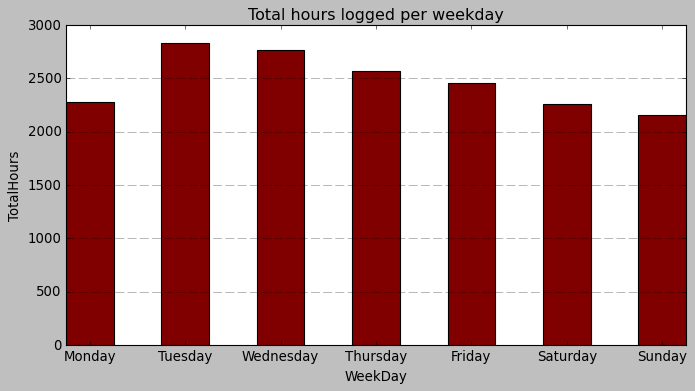

In [261]:
plt.figure(figsize=(10,5))
plt.bar(weekdays_df.WeekDay, weekdays_df.TotalHours, width=0.5, color='maroon', edgecolor='black')

plt.xlabel("WeekDay")
plt.ylabel("TotalHours")
plt.title("Total hours logged per weekday")
plt.grid(axis='y',dashes=(8,3), alpha=0.5)
plt.show()


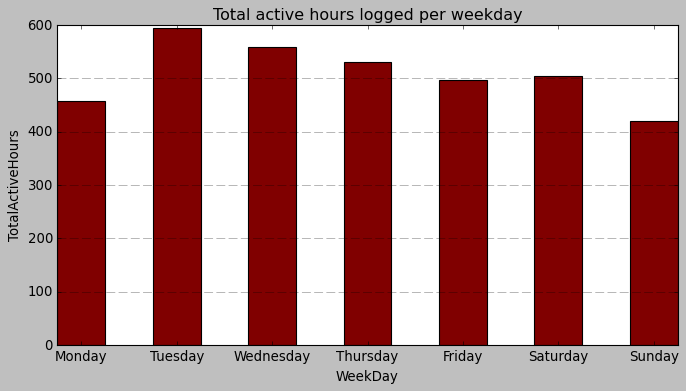

In [265]:
plt.figure(figsize=(10,5))
plt.bar(weekdays_df.WeekDay, weekdays_df.TotalActiveHours, width=0.5, color='maroon', edgecolor='black')

plt.xlabel("WeekDay")
plt.ylabel("TotalActiveHours")
plt.title("Total active hours logged per weekday")
plt.grid(axis='y',dashes=(8,3), alpha=0.5)
plt.show()

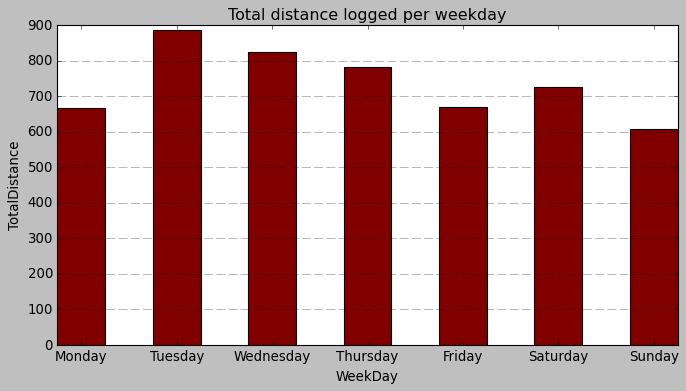

In [266]:
plt.figure(figsize=(10,5))
plt.bar(weekdays_df.WeekDay, weekdays_df.TotalDistance, width=0.5, color='maroon', edgecolor='black')

plt.xlabel("WeekDay")
plt.ylabel("TotalDistance")
plt.title("Total distance logged per weekday")
plt.grid(axis='y',dashes=(8,3), alpha=0.5)
plt.show()

In [268]:
veryActiveMins = df.VeryActiveMinutes.sum()
fairlyActiveMins = df.FairlyActiveMinutes.sum()
lightlyActiveMins = df.LightlyActiveMinutes.sum()
sedentaryMins = df.SedentaryMinutes.sum()

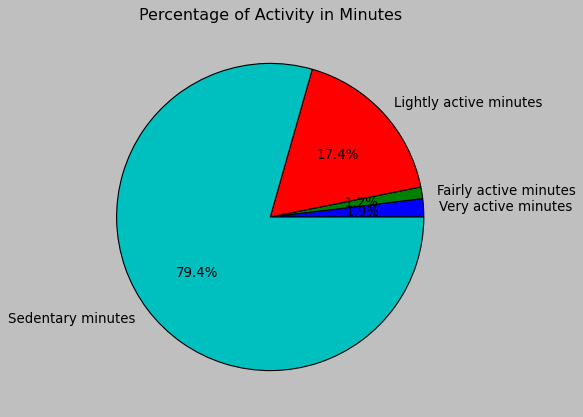

In [270]:
slices = [veryActiveMins,fairlyActiveMins,lightlyActiveMins,sedentaryMins]
labels = ["Very active minutes", "Fairly active minutes", "Lightly active minutes", "Sedentary minutes"]

plt.pie(slices, labels = labels, wedgeprops = {"edgecolor": "black"}, autopct = "%1.1f%%")
plt.title("Percentage of Activity in Minutes")
plt.show()

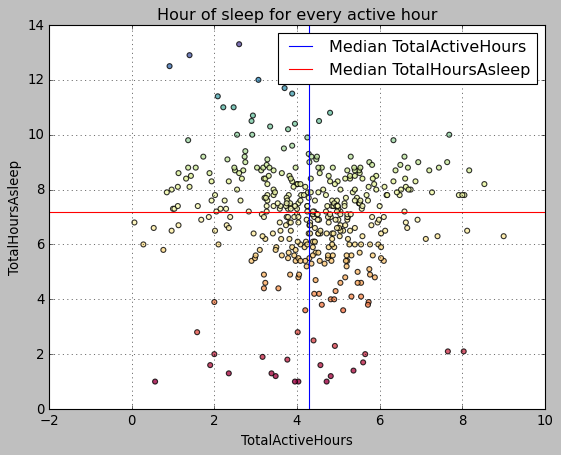

In [281]:
plt.figure(figsize=(8,6)) # Specify size of the chart
plt.scatter(df['TotalActiveHours'], df['TotalHoursAsleep'], alpha = 0.8, c = df['TotalHoursAsleep'], cmap = "Spectral")

plt.xlabel("TotalActiveHours")
plt.ylabel("TotalHoursAsleep")
plt.title("Hour of sleep for every active hour")

medianActiveHours = df['TotalActiveHours'].median()
medianTotalHoursAsleep = df['TotalHoursAsleep'].median()

plt.axvline(medianActiveHours,label='Median TotalActiveHours')
plt.axhline(medianTotalHoursAsleep, color ='red', label ='Median TotalHoursAsleep')
plt.grid(True)
plt.legend()
plt.show()

Future analysis see if time in bed not sleeping is less with more exercise
